In [201]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os
from matplotlib.ticker import EngFormatter

In [202]:
data = []
for root, dirs, files in os.walk("."):
    path = root.split(os.sep)

    for file in filter(lambda x: x.endswith('.txt'), files):

        with open(os.path.join(root, file), 'r') as f:
            content = f.read()

        server_type, count_threads, count_connections, port = file.split('_')
        port = port.split('.')[0]

        latency = re.findall(r".*?Latency\s*([\d\.]+[a-z]+)", content)
        requests_per_sec = re.findall(r".*?Requests/sec:\s*([\d\.]+)", content)
        transfer_per_sec = re.findall(r".*?Transfer/sec:\s*([\d\.]+[a-zA-Z]+)", content)
        for i in range(len(latency)):
            data.append({
                "Server Type": server_type,
                "Count Threads": int(count_threads),
                "Connections": int(count_connections),
                "Port": int(port),
                "Requests/Sec": float(requests_per_sec[i]),
                "Transfer/Sec": transfer_per_sec[i],
                "Latency": latency[i]
            })

df = pd.DataFrame(data)

In [203]:
df

,Server Type,Count Threads,Connections,Port,Requests/Sec,Transfer/Sec,Latency
0,asm,32,10000,12345,172512.72,6.25MB,57.48ms
1,asm,32,10000,12345,175949.83,6.38MB,56.35ms
2,asm,32,10000,12345,170547.32,6.18MB,58.11ms
3,asm,32,30000,12345,156069.23,5.66MB,185.02ms
4,asm,32,30000,12345,156372.50,5.67MB,183.61ms
...,...,...,...,...,...,...,...
2062,reactor,2,150000,12346,59039.16,2.14MB,110.39ms
2063,reactor,2,150000,12346,65815.48,2.39MB,119.20ms
2064,reactor,2,150000,12345,51109.83,1.85MB,110.52ms
2065,reactor,2,150000,12345,51688.30,1.87MB,108.98ms


In [204]:
def convert_to_bytes(val):
    if 'KB' in val:  # Kilobytes
        return float(val.replace('KB', '')) * 1024
    elif 'MB' in val:  # Megabytes
        return float(val.replace('MB', '')) * (1024 ** 2)
    elif 'GB' in val:  # Gigabytes
        return float(val.replace('GB', '')) * (1024 ** 3)
    elif 'B' in val:  # Bytes
        return float(val.replace('B', ''))
    return np.nan  # add NaN for any unexpected value or add your exception here


df['Transfer/Sec'] = df['Transfer/Sec'].apply(convert_to_bytes)

In [205]:
df[df['Transfer/Sec'] == np.nan]

,Server Type,Count Threads,Connections,Port,Requests/Sec,Transfer/Sec,Latency


In [206]:
def convert_to_microseconds(val):
    if 'us' in val:  # Microseconds
        return float(val.replace('us', ''))
    if 'ms' in val:  # Milliseconds
        return float(val.replace('ms', '')) * 1000
    if 's' in val:  # Seconds
        return float(val.replace('s', '')) * 1000 ** 2
    return np.nan  # add NaN for any unexpected value or add your exception here


df['Latency'] = df['Latency'].apply(convert_to_microseconds)

In [207]:
df[df['Latency'] == np.nan]

,Server Type,Count Threads,Connections,Port,Requests/Sec,Transfer/Sec,Latency


In [208]:
df

,Server Type,Count Threads,Connections,Port,Requests/Sec,Transfer/Sec,Latency
0,asm,32,10000,12345,172512.72,6553600.00,57480.00
1,asm,32,10000,12345,175949.83,6689914.88,56350.00
2,asm,32,10000,12345,170547.32,6480199.68,58110.00
3,asm,32,30000,12345,156069.23,5934940.16,185020.00
4,asm,32,30000,12345,156372.50,5945425.92,183610.00
...,...,...,...,...,...,...,...
2062,reactor,2,150000,12346,59039.16,2243952.64,110390.00
2063,reactor,2,150000,12346,65815.48,2506096.64,119200.00
2064,reactor,2,150000,12345,51109.83,1939865.60,110520.00
2065,reactor,2,150000,12345,51688.30,1960837.12,108980.00


In [209]:
df['Index'] = df.groupby(['Server Type', 'Count Threads', 'Connections']).cumcount() % 3

In [210]:
df

,Server Type,Count Threads,Connections,Port,Requests/Sec,Transfer/Sec,Latency,Index
0,asm,32,10000,12345,172512.72,6553600.00,57480.00,0
1,asm,32,10000,12345,175949.83,6689914.88,56350.00,1
2,asm,32,10000,12345,170547.32,6480199.68,58110.00,2
3,asm,32,30000,12345,156069.23,5934940.16,185020.00,0
4,asm,32,30000,12345,156372.50,5945425.92,183610.00,1
...,...,...,...,...,...,...,...,...
2062,reactor,2,150000,12346,59039.16,2243952.64,110390.00,1
2063,reactor,2,150000,12346,65815.48,2506096.64,119200.00,2
2064,reactor,2,150000,12345,51109.83,1939865.60,110520.00,0
2065,reactor,2,150000,12345,51688.30,1960837.12,108980.00,1


In [211]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_grouped = df.groupby(['Server Type', 'Count Threads', 'Connections', 'Index']).agg({
    'Requests/Sec': 'sum',
    'Transfer/Sec': 'sum',
    'Latency': 'mean'
}).reset_index()
df_grouped = df_grouped.drop('Index', axis=1)
df_grouped = df_grouped[df_grouped['Server Type'] != 'blocking']
df_grouped = df_grouped[df_grouped['Count Threads'] != 1]
df_grouped

,Server Type,Count Threads,Connections,Requests/Sec,Transfer/Sec,Latency
27,asm,2,100,322518.97,12257853.44,297.31
28,asm,2,100,301571.40,11460935.68,313.45
29,asm,2,100,306674.52,11649679.36,310.43
30,asm,2,1000,332989.44,12656312.32,2900.00
31,asm,2,1000,322299.70,12247367.68,3000.00
...,...,...,...,...,...,...
806,reactor,40,200000,330013.46,12540968.96,89530.00
807,reactor,40,200000,316619.24,12037652.48,88410.00
808,reactor,40,300000,132020.31,5012940.80,77921.43
809,reactor,40,300000,145117.00,5517516.80,75220.00


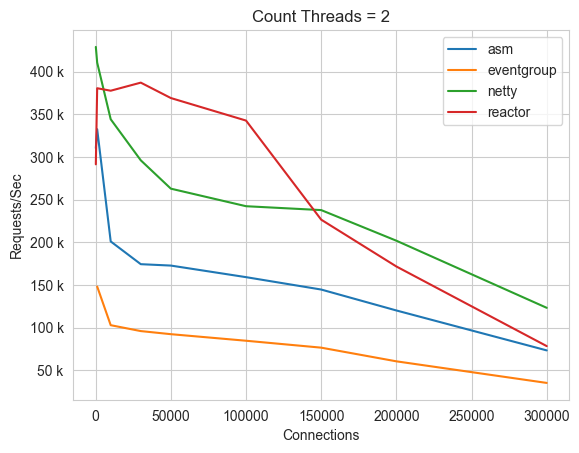

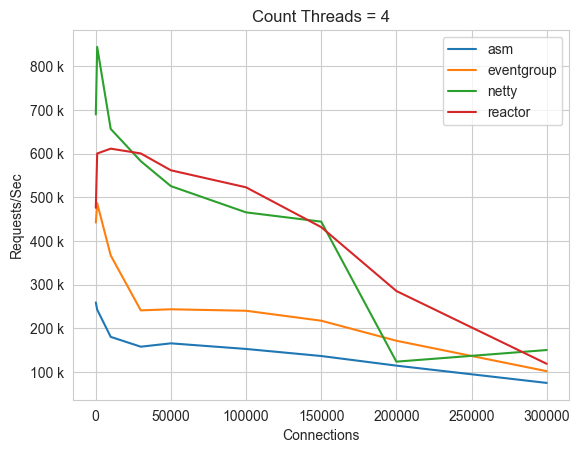

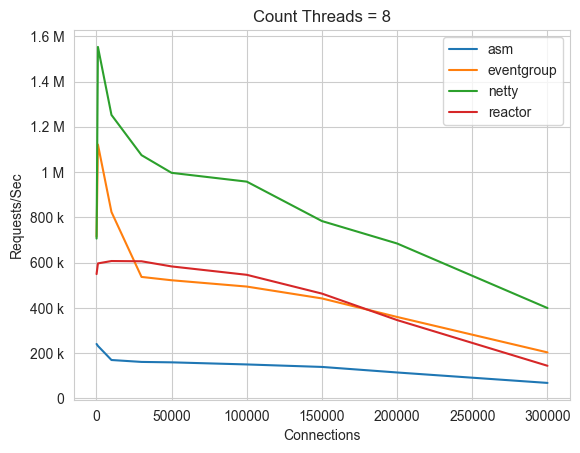

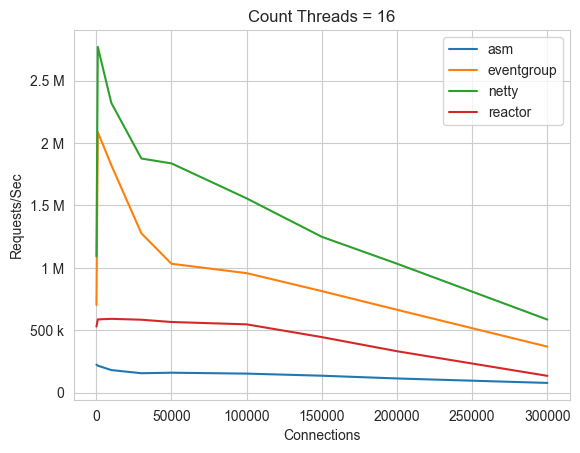

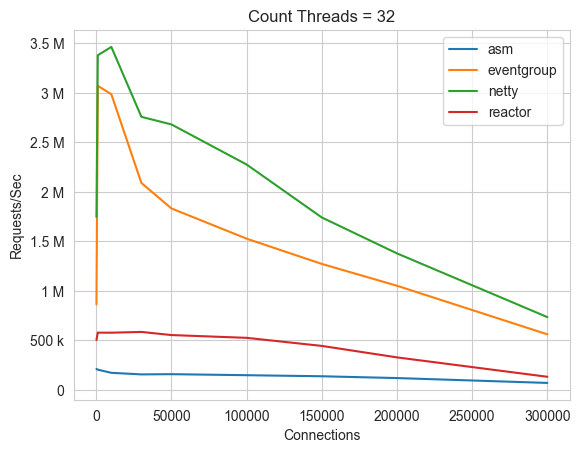

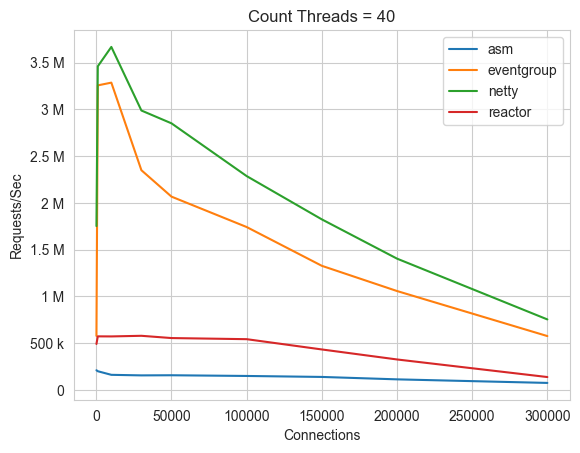

In [212]:
count_threads_values = df_grouped['Count Threads'].unique()

for count in count_threads_values:
    df_count = df_grouped[df_grouped['Count Threads'] == count]
    
    plt.figure()
    
    server_types = df_count['Server Type'].unique()
    for server in server_types:
        df_server = df_count[df_count['Server Type'] == server]

        df_grouped_conn_req = df_server.groupby('Connections')['Requests/Sec'].mean().reset_index()

        plt.plot(df_grouped_conn_req['Connections'], df_grouped_conn_req['Requests/Sec'], label=server)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(EngFormatter())
    plt.legend() 
    plt.title(f'Count Threads = {count}')
    plt.xlabel('Connections')
    plt.ylabel('Requests/Sec')
    plt.show()
    

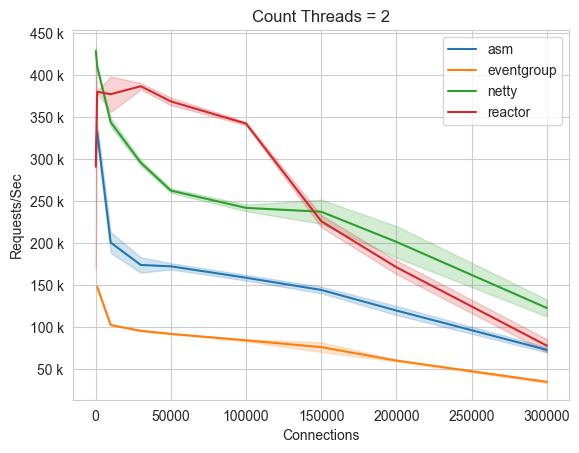

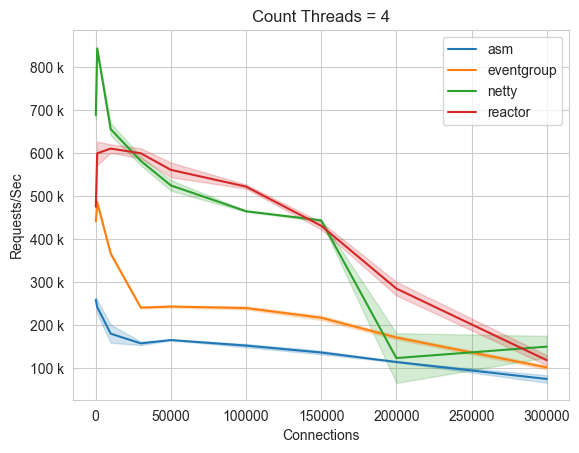

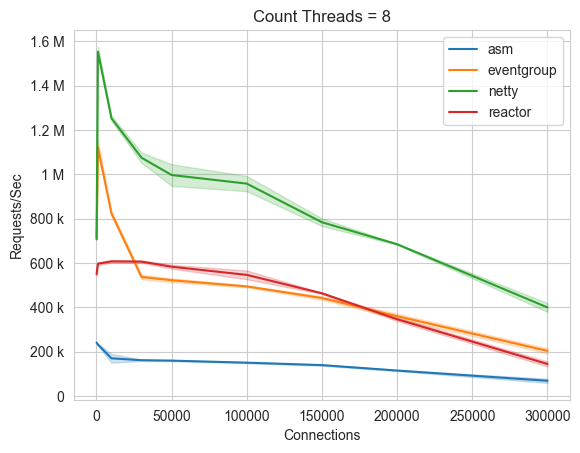

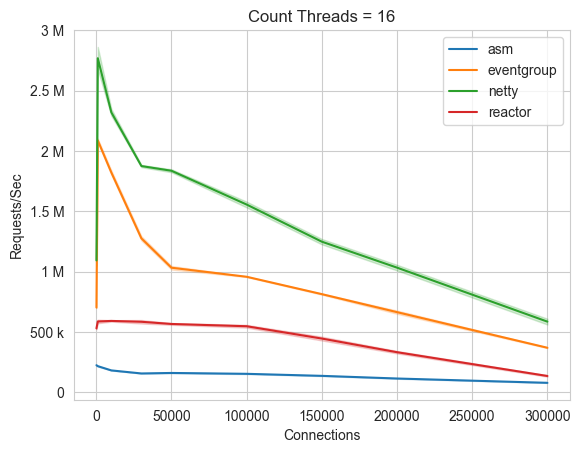

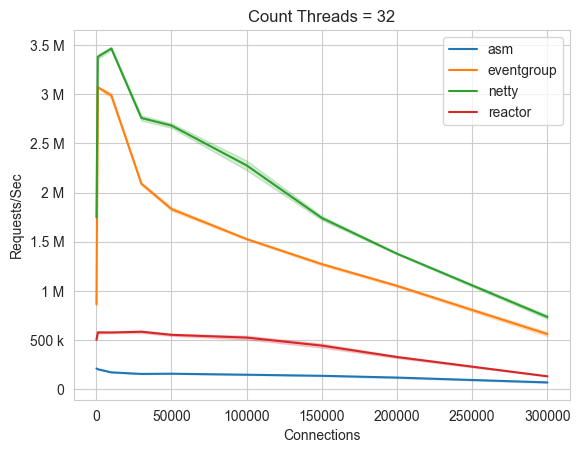

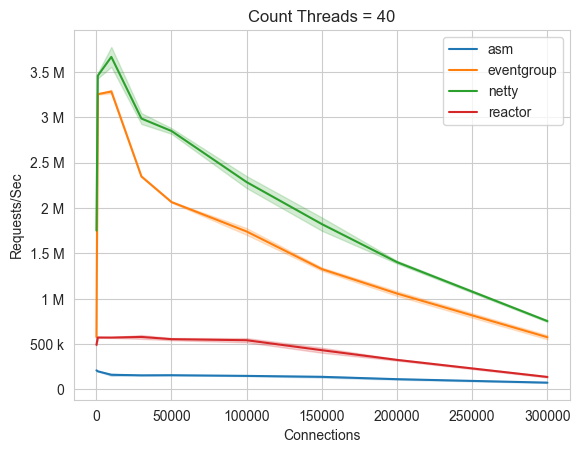

In [213]:
count_threads_values = df_grouped['Count Threads'].unique()

for count in count_threads_values:
    df_count = df_grouped[df_grouped['Count Threads'] == count]
    
    plt.figure()
    
    sns.lineplot(data=df_count, x='Connections', y='Requests/Sec', hue='Server Type', errorbar='sd')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(EngFormatter())
    plt.legend() 
    plt.title(f'Count Threads = {count}')
    plt.xlabel('Connections')
    plt.ylabel('Requests/Sec')
    plt.show()
    

In [214]:
df_grouped[(df_grouped['Count Threads'] == 2) & (df_grouped['Server Type'] == "eventgroup")]

,Server Type,Count Threads,Connections,Requests/Sec,Transfer/Sec,Latency
276,eventgroup,2,1000,146583.64,5567938.56,6590.00
277,eventgroup,2,1000,149607.49,5683281.92,6450.00
278,eventgroup,2,10000,103047.72,3911188.48,96280.00
279,eventgroup,2,10000,102118.51,3879731.20,97600.00
280,eventgroup,2,10000,103198.62,3921674.24,96000.00
281,eventgroup,2,30000,95342.77,3628072.96,301270.00
282,eventgroup,2,30000,96774.63,3680501.76,297290.00
283,eventgroup,2,30000,95533.33,3628072.96,301750.00
284,eventgroup,2,50000,91743.34,3481272.32,525605.00
285,eventgroup,2,50000,92245.36,3512729.60,524540.00


In [215]:
df_grouped.columns

Index(['Server Type', 'Count Threads', 'Connections', 'Requests/Sec',
       'Transfer/Sec', 'Latency'],
      dtype='object')

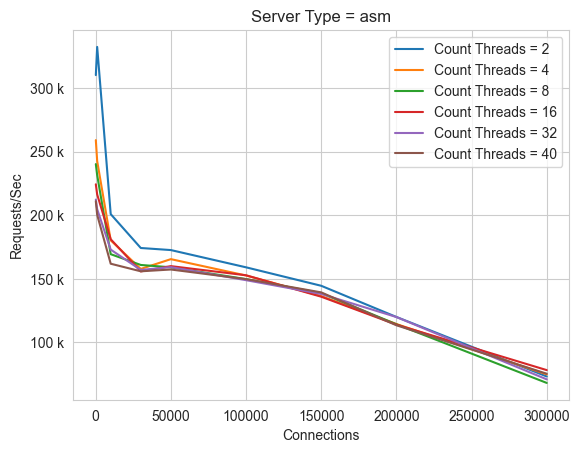

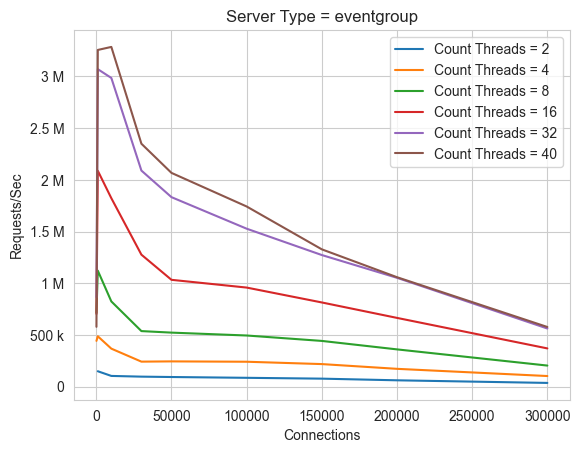

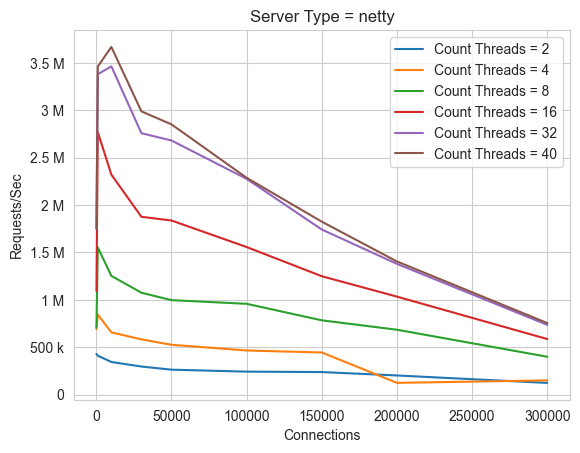

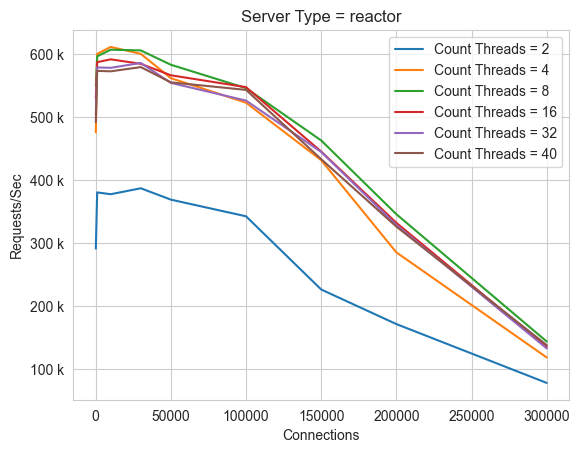

In [216]:
server_values = df_grouped['Server Type'].unique()

for server in server_values:
    df_server = df_grouped[df_grouped['Server Type'] == server]
    
    plt.figure() 
    
    
    count_threads = df_server['Count Threads'].unique()
    for count in count_threads:
        df_count = df_server[df_server['Count Threads'] == count]

        df_grouped_conn_req = df_count.groupby('Connections')['Requests/Sec'].mean().reset_index()

        plt.plot(df_grouped_conn_req['Connections'], df_grouped_conn_req['Requests/Sec'], label=f'Count Threads = {count}')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(EngFormatter())
    plt.legend()
    plt.title(f'Server Type = {server}')
    plt.xlabel('Connections')
    plt.ylabel('Requests/Sec')
    plt.show()

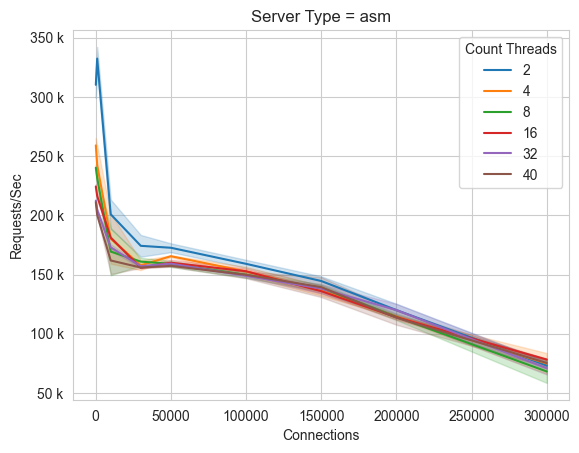

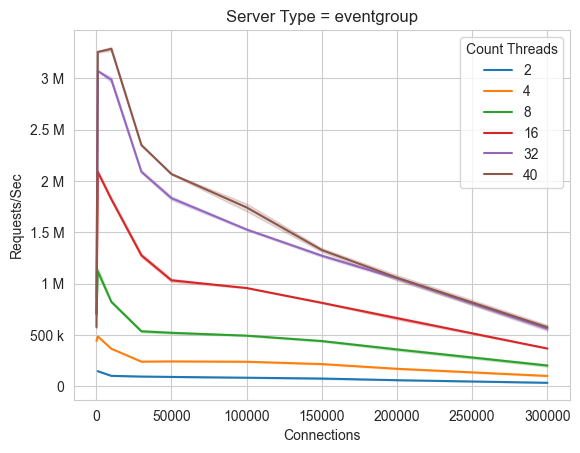

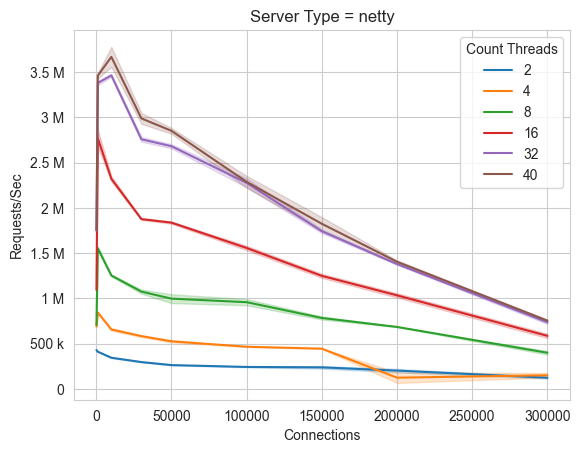

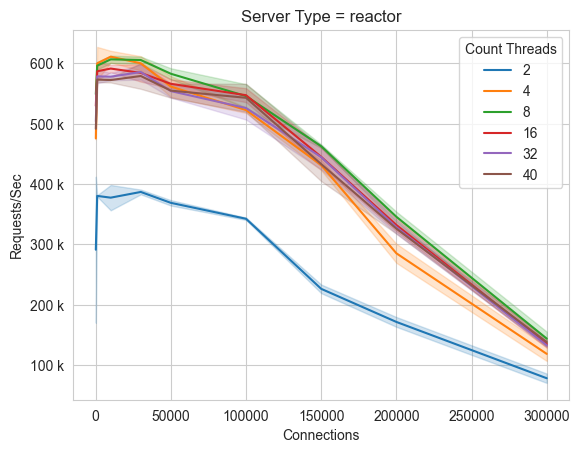

In [217]:
df_grouped['Count Threads'] = df_grouped['Count Threads'].apply(lambda x: f'{x}')

server_values = df_grouped['Server Type'].unique()
for server in server_values:
    df_server = df_grouped[df_grouped['Server Type'] == server]
    
    plt.figure()
    
    sns.lineplot(data=df_server, x='Connections', y='Requests/Sec', hue='Count Threads', errorbar='sd')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(EngFormatter())
    plt.title(f'Server Type = {server}')
    plt.xlabel('Connections')
    plt.ylabel('Requests/Sec')
    plt.legend(title='Count Threads')
    plt.show()